## Import Libraries

In [1]:
%load_ext tensorboard
import tensorflow as tf
import datetime
# Clear any logs from previous runs
#rm -rf ./logs/

In [2]:
# Importing the libraries, fill the import name libraries below
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler

#Import keras libraries that you need
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error

# EDA

In [3]:
# Some functions to help out with this code
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()
    #fill the function to predict

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    #fill the function for evaluation model

In [4]:
# Import Dataset
dataset = pd.read_csv('AABA_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [5]:
# Checking for type data 
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [6]:
# Checking for missing values
dataset.isnull().sum() 

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [7]:
# choose for data training and set in kind of year
#training_set : 2006-2016
#test_set : 2017-2018
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

### Insight in EDA
Pada tahapan Exploratory Data Analysis (EDA) saya mengamati kumpulan data yang ada pada file "AABA_2006-01-01_to_2018-01-01.csv". Selanjutnya pada jupyter notebook dilihat lagi type data dan missing values, selain itu saya juga langsung membagi data menjadi 2 (data train dan test). Hasil dari proses ini, saya dapat melihat bahwa data sudah bisa langsung di proses. Hal ini karena tidak ada missing values dan penulisan data telah seragam. Oleh karena itu saya langsung melakukan spitting data.

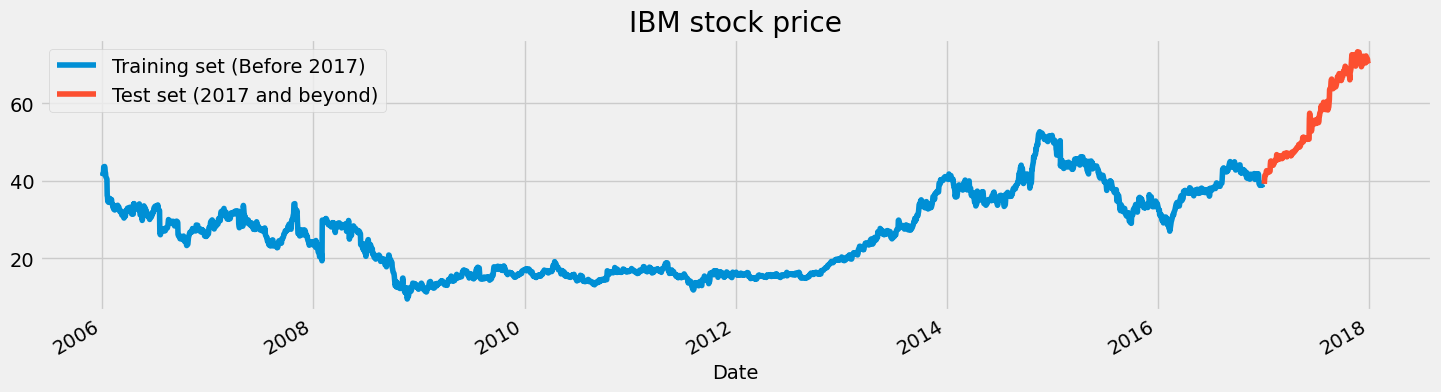

In [8]:
#Checking for stock's market company with line plot
#Write your code below
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [9]:
# Scaling with minmaxscaller for data train
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
#checking shape of data train
training_set_scaled.shape

(2768, 1)

In [11]:
# create data structure to fill how many row for input in your model at data train
X_train = []
y_train = []
for i in range(60,2768):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    #fill for x_train and y_train here

#change it into the array
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
# Reshaping X_train before modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## Modelling

In [13]:
# Sequential Modelling
model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Third LSTM layer, fill the code below
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Fourth LSTM layer, fill the code below
model.add(LSTM(units=50))
model.add(Dropout(0.2))
# The output layer
model.add(Dense(units=1))
# Compiling
model.compile(optimizer='rmsprop',loss='mean_squared_error')
# Train fitting for the model
model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 8s 42ms/step - loss: 0.0131
Epoch 2/50
85/85 [==============================] - 3s 41ms/step - loss: 0.0070
Epoch 3/50
85/85 [==============================] - 4s 42ms/step - loss: 0.0056
Epoch 4/50
85/85 [==============================] - 4s 42ms/step - loss: 0.0047
Epoch 5/50
85/85 [==============================] - 3s 41ms/step - loss: 0.0044
Epoch 6/50
85/85 [==============================] - 4s 41ms/step - loss: 0.0041
Epoch 7/50
85/85 [==============================] - 3s 41ms/step - loss: 0.0037
Epoch 8/50
85/85 [==============================] - 4s 41ms/step - loss: 0.0033
Epoch 9/50
85/85 [==============================] - 3s 41ms/step - loss: 0.0033
Epoch 10/50
85/85 [==============================] - 3s 41ms/step - loss: 0.0030
Epoch 11/50
85/85 [==============================] - 3s 41ms/step - loss: 0.0027
Epoch 12/50
85/85 [==============================] - 3s 41ms/step - loss: 0.0027
Epoch 13/50
85/85 [==================

In [14]:
# Prepare for data test similar way for data train
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
test = ...
test = dataset_total[len(dataset_total)-len(test_set) - 60:].values
test = test.reshape(-1,1)
test  = sc.transform(test)
#Transform the inputs

In [15]:
#checking data test shape
test.shape

(311, 1)

### Prediction

In [16]:
# Preparing X_test and predicting the prices of the stock's that you choose
X_test = []
for i in range(60,311):
    X_test.append(test[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#Predicting stocks price
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 1s 15ms/step


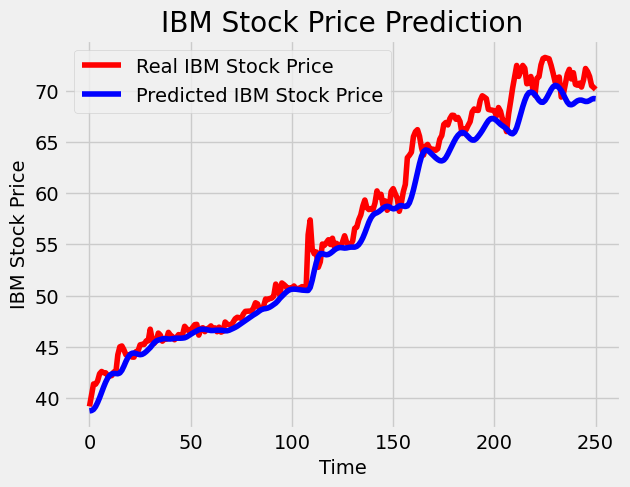

In [17]:
# Visualizing the results for prediction 
plot_predictions(test_set,predicted_stock_price)

In [18]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 1.8846753255099358.


### Insight and advice


Dari hasil evaluasi menggunakan diagram dan di lihat dari root mean squared error (RSME), model RNN dengan LSTM dapat digunakan untuk melakukan prediksi saham. Hal ini dikarenakan nilai error yang hanya 1.88% dan pada diagram hasil prediksi IBM tidak melenceng jauh dari IBM aslinya.